# Initial setup

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient
sns.set(color_codes=True)

# Connection to local database

In [ ]:
connection = MongoClient()
db = connection.test
input_data = db.clients

# Assign collection to a dataframe

In [3]:
df = pd.DataFrame(list(input_data.find()))

# Clean and explore data

In [4]:
# In order to know the structure of the data it will be displayed the top and bottom rows
# Display the top 5 rows
df.head()

,_id,documento,tipo_doc,categoria,mnt_trx_mm,num_trx,pct_mnt_tot,pct_num_trx_tot
0,5e181059312bcb86cf876a43,-9220026565340510548,2,TRANSPORTE,7.950000,70,0.160356,0.216718
1,5e181059312bcb86cf876a44,-9221406660220722252,1,TRANSPORTE,0.340000,4,0.069246,0.250000
2,5e181059312bcb86cf876a45,-9220026565340510548,2,HOGAR,14.590000,33,0.294288,0.102167
3,5e181059312bcb86cf876a46,-9220026565340510548,2,SALUD Y CUIDADO PERSONAL,1.280000,12,0.025818,0.037152
4,5e181059312bcb86cf876a47,-9220026565340510548,2,TECNOLOGÍA Y COMUNICACIONES,0.490393,3,0.009891,0.009288


In [5]:
# To display the bottom 5 rows
df.tail()

,_id,documento,tipo_doc,categoria,mnt_trx_mm,num_trx,pct_mnt_tot,pct_num_trx_tot
149995,5e18105b312bcb86cf89b42e,9222457444389231440,1,HOGAR,1.060000,19,0.294444,0.316667
149996,5e18105b312bcb86cf89b42f,9222457444389231440,1,SALUD Y CUIDADO PERSONAL,0.810000,13,0.225000,0.216667
149997,5e18105b312bcb86cf89b430,9223184668084986768,1,COMIDA,0.825444,3,0.350146,0.066667
149998,5e18105b312bcb86cf89b431,9223184668084986768,1,OTROS,0.492055,38,0.208725,0.844444
149999,5e18105b312bcb86cf89b432,9223184668084986768,1,MODA,1.039930,4,0.441129,0.088889


In [6]:
# Checking the data type
df.dtypes

_id                 object
documento            int64
tipo_doc             int64
categoria           object
mnt_trx_mm         float64
num_trx              int64
pct_mnt_tot        float64
pct_num_trx_tot    float64
dtype: object

In [7]:
# Total number of rows and columns in order to know the size of the data
df.shape

(150000, 8)

In [26]:
df.count() 

_id                150000
documento          150000
tipo_doc           150000
categoria          150000
mnt_trx_mm         150000
num_trx            150000
pct_mnt_tot        150000
pct_num_trx_tot    150000
dtype: int64

In [27]:
# Look for rows containing duplicated data
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 8)


In [32]:
# Look for rows with nulls or nas values
df.isnull().sum()

_id                0
documento          0
tipo_doc           0
categoria          0
mnt_trx_mm         0
num_trx            0
pct_mnt_tot        0
pct_num_trx_tot    0
dtype: int64

In [35]:
# Drop nas values and count the new len of each serie
df = df.dropna() 
df.count()

_id                150000
documento          150000
tipo_doc           150000
categoria          150000
mnt_trx_mm         150000
num_trx            150000
pct_mnt_tot        150000
pct_num_trx_tot    150000
dtype: int64

In [13]:
# View unique types for series with "limited" values
len(df["documento"].unique())

40879

In [14]:
df["tipo_doc"].unique()

array([2, 1], dtype=int64)

In [15]:
df["categoria"].unique()

array(['TRANSPORTE', 'HOGAR', 'SALUD Y CUIDADO PERSONAL',
       'TECNOLOGÍA Y COMUNICACIONES', 'ENTRETENIMIENTO', 'VIAJES',
       'OTROS', 'MODA', 'COMIDA', 'RETIROS EN EFECTIVO', 'EDUCACIÓN',
       'MASCOTAS'], dtype=object)

In [16]:

len(df["categoria"].unique())

12

In [38]:
# Look for weird values in numeric values for example negatives
len(df[df["mnt_trx_mm"]<0])

0

In [40]:
len(df[df["num_trx"]<0])

0

In [49]:
len(df[df["pct_mnt_tot"]<0])

0

In [43]:
len(df[df["pct_num_trx_tot"]<0])

0

# Explore data

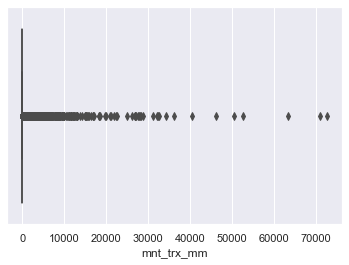

In [47]:
%matplotlib inline
sns.boxplot(x=df["mnt_trx_mm"])

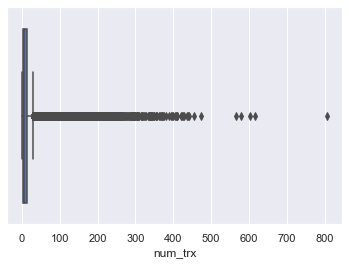

In [20]:
sns.boxplot(x=df["num_trx"])

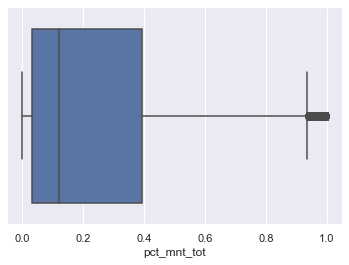

In [63]:
sns.boxplot(x=df["pct_mnt_tot"])


In [70]:
Q1 = df["pct_mnt_tot"].quantile(0.25)
Q2 = df["pct_mnt_tot"].quantile(0.5)
Q3 = df["pct_mnt_tot"].quantile(0.75)
Q4 = df["pct_mnt_tot"].quantile(0.9)
print(Q1)
print(Q2)
print(Q3)
print(Q4)

0.030928770997617733
0.11970888444747396
0.39204545454545453
0.8927267946541739


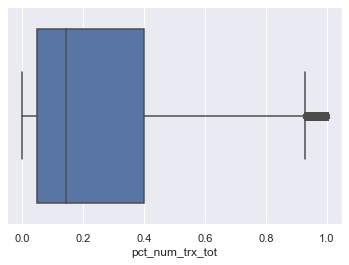

In [51]:
sns.boxplot(x=df["pct_num_trx_tot"])

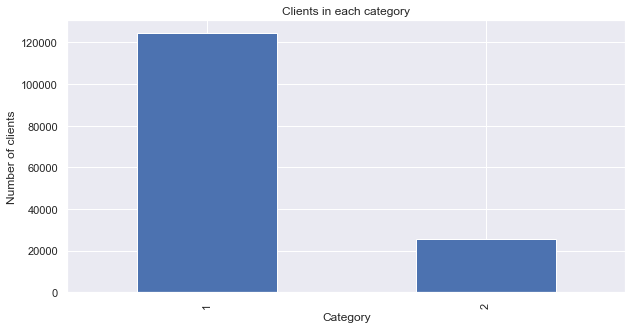

In [79]:
# Plotting a bar chart for type of doc
df["tipo_doc"].value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title("Clients in each category")
plt.ylabel("Number of clients")
plt.xlabel("Category");

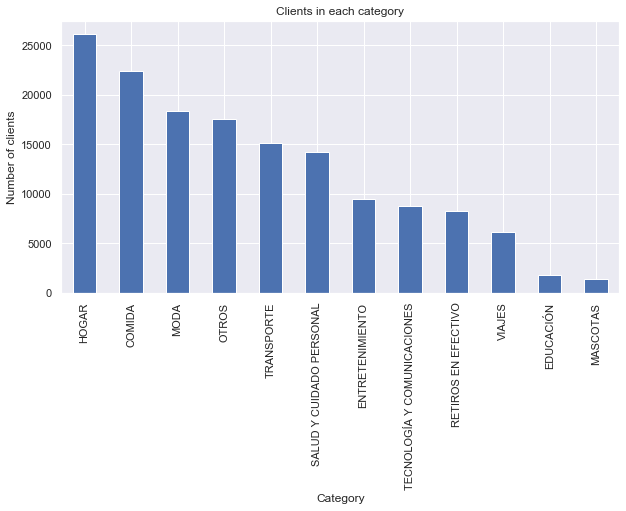

In [62]:
# Plotting a bar chart for categories
df["categoria"].value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title("Clients in each category")
plt.ylabel("Number of clients")
plt.xlabel("Category");

In [71]:
df.describe()

,documento,tipo_doc,mnt_trx_mm,num_trx,pct_mnt_tot,pct_num_trx_tot
count,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,1.344256e+16,1.170667,24.967153,12.742507,0.266855,0.272582
std,5.318371e+18,0.376219,612.668753,24.462331,0.318097,0.301731
min,-9.222147e+18,1.000000,0.000000,1.000000,0.000000,0.000665
25%,-4.598571e+18,1.000000,0.150000,2.000000,0.030929,0.048193
50%,3.726371e+15,1.000000,0.510000,4.000000,0.119709,0.142857
75%,4.631182e+18,1.000000,1.744728,13.000000,0.392045,0.400000
max,9.223185e+18,2.000000,72623.371734,806.000000,1.000000,1.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 8 columns):
_id                150000 non-null object
documento          150000 non-null int64
tipo_doc           150000 non-null int64
categoria          150000 non-null object
mnt_trx_mm         150000 non-null float64
num_trx            150000 non-null int64
pct_mnt_tot        150000 non-null float64
pct_num_trx_tot    150000 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 9.2+ MB


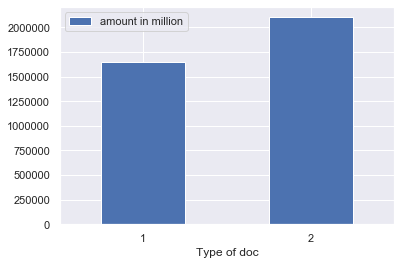

In [87]:
d1 = df["mnt_trx_mm"][df["tipo_doc"]==1].sum()
d2 = df["mnt_trx_mm"][df["tipo_doc"]==2].sum()
df2 =  pd.DataFrame({'Type of doc':['1','2'], 'amount in million':[d1,d2]})
ax = df2.plot.bar(x='Type of doc', y='amount in million', rot=0)